In [1]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
model = models.vgg16_bn(pretrained=True)
time1 = time.time()
print(model)


Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /home/austinguish/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:49<00:00, 11.3MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [2]:
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(25088,4096),
                                 nn.ReLU(),
                                 nn.Dropout(0.6),
                                 nn.Linear(4096,4096),
                                 nn.ReLU(),
                                 nn.Dropout(0.6),
                                 nn.Linear(4096,6))
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

transfer_vgg16_bn_ADAM
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.3817, Accuracy: 57.4095%,Valid: Loss: 0.7673, Accuracy: 74.3902%,Time: 11.4630s
Epoch: 2
Epoch: 002, Training: Loss: 0.2816, Accuracy: 90.7805%,Valid: Loss: 0.6409, Accuracy: 78.9634%,Time: 11.1723s
Epoch: 3
Epoch: 003, Training: Loss: 0.0964, Accuracy: 96.7760%,Valid: Loss: 0.8153, Accuracy: 79.2683%,Time: 10.6238s
Epoch: 4
Epoch: 004, Training: Loss: 0.0427, Accuracy: 98.6991%,Valid: Loss: 0.7272, Accuracy: 85.3659%,Time: 10.9969s
Epoch: 5
Epoch: 005, Training: Loss: 0.0080, Accuracy: 99.7172%,Valid: Loss: 0.7767, Accuracy: 83.5366%,Time: 11.2521s
Epoch: 6
Epoch: 006, Training: Loss: 0.0442, Accuracy: 99.1516%,Valid: Loss: 0.6060, Accuracy: 86.5854%,Time: 11.0219s
Epoch: 7
Epoch: 007, Training: Loss: 0.0081, Accuracy: 99.8869%,Valid: Loss: 0.6965, Accuracy: 86.2805%,Time: 10.8829s
Epoch: 8
Epoch: 008, Training: Loss: 0.0217, Accuracy: 99.7738%,Valid: Loss: 0.6166, Accuracy: 86.5854%,Time: 10.8460s
Epoch: 9
Epoch: 

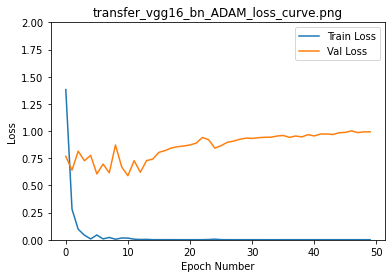

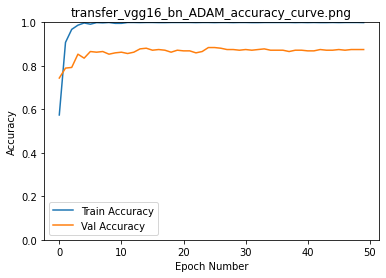

778.0779349803925


In [3]:
device = 9
model_name_list = ["transfer_vgg16_bn"]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
file_name = model_name_list[0]+'_'+"ADAM"
print(file_name)
optimizer = optim.Adam(model.parameters())
trainmodel(model_name=model,loss = lossfunc,batchsize=36,opti=optimizer,\
           epoch_num=50,device_num=device,filename=file_name)
time2 = time.time()
print(time2-time1)